This notebook is shared with all the members of the 'University of Pennsylvania' group. The following is the link to the notebook:
https://colab.research.google.com/drive/10YxfLLD85g0TL7Nw3n9cOeuIJJSwofsU?usp=sharing

# 1. Installing the Dependencies
>In this section, we will install all the necessary dependencies required to run the analysis for our project. We will start by mounting Google Drive, which will allow us to access the required datasets and files. We will also install the Kaggle API to download the dataset directly into our notebook.

 Mounting Drive
 >To access our datasets and files, we need to mount Google Drive. This can be done using the following code:

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing kaggle for dataset download
>We will now install the Kaggle API, which will enable us to download the dataset directly into our notebook. This is a useful tool, as it saves us time and effort from manually downloading and uploading datasets. To install the Kaggle API, we will run the following code:

In [49]:
#Installing kaggle
%%capture
!apt update
!pip install kaggle

Installing packages
>In this section, we will install all the necessary packages for our project. We have categorized the imports into different categories, such as visualization, natural language processing (NLP), machine learning (ML), and others, to make it easier to understand their purpose.

In [50]:
# Visualization imports
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural Language Processing (NLP) imports
import nltk
from nltk.corpus import stopwords
import glob
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ML imports
import torch

# Other imports
import os
import json
import pandas as pd
import numpy as np
import datetime as dt
from tqdm import tqdm

#imports for models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt


#2. Downloading the Tweets and Stock Data
>In this section, we will download the required datasets from Kaggle and read them into our notebook.




*   Creating a directory called kaggle
*   Copying kaggle.json from specified location



In [51]:
# Create Directory
!mkdir ~/.kaggle

#Copying kaggle.json to kaggle directory
!cp /content/drive/Shareddrives/project545/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists




*   Downloading dataset from Kaggle named 'all-covid19-vaccines-tweets'
*   Unzipping the downloaded zip file



In [52]:
#Downloading specified data as zip
!!kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

#Unzip the zip file
!unzip /content/all-covid19-vaccines-tweets.zip

Archive:  /content/all-covid19-vaccines-tweets.zip
replace vaccination_all_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vaccination_all_tweets.csv  


Reading the CSV file and printing the first five the tweets data rows

In [53]:
df_tweets_org = pd.read_csv('vaccination_all_tweets.csv')
tweets_df= df_tweets_org.copy()

Reading the CSV file for stock data

In [54]:
path = '/content/drive/Shareddrives/project545/'
df_5 = pd.read_csv(path+'pfizer_dataset.csv')

#3. Exploratory Data Analysis on raw data
>In this section, we will perform exploratory data analysis (EDA) on the raw data. We will analyze the tweets and stock data to gain insights and understand the distribution of the features.

## Tweets Data

First five rows in raw tweets data frame

In [55]:
df_tweets_org.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Descriptive Statistics for raw tweets dataframe







In [56]:
#All the relevant statistics
df_tweets_org.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


Data types of each feature for raw tweets data
> we can see that date is of 'object' type

In [57]:
#Data types of each feature
df_tweets_org.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

Missing values for raw tweets data


In [58]:
#Summing the number of null values for a particular feature 
df_tweets_org.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

We will create bar plots for the number of tweets containing hashtags and the number of verified and unverified users. This will help us understand the distribution of these categorical features.
>The bar plot shows that there are 178,504 tweets containing hashtags and 49,703 tweets without hashtags. This indicates that a significant majority of tweets about COVID-19 vaccines include hashtags, suggesting that users frequently use hashtags to categorize or emphasize their tweets' content.

>The bar plot reveals that there are 209,005 unverified users and 19,202 verified users who have tweeted about COVID-19 vaccines. The majority of users are unverified, implying that the majority of tweets come from everyday individuals rather than influential figures or organizations.


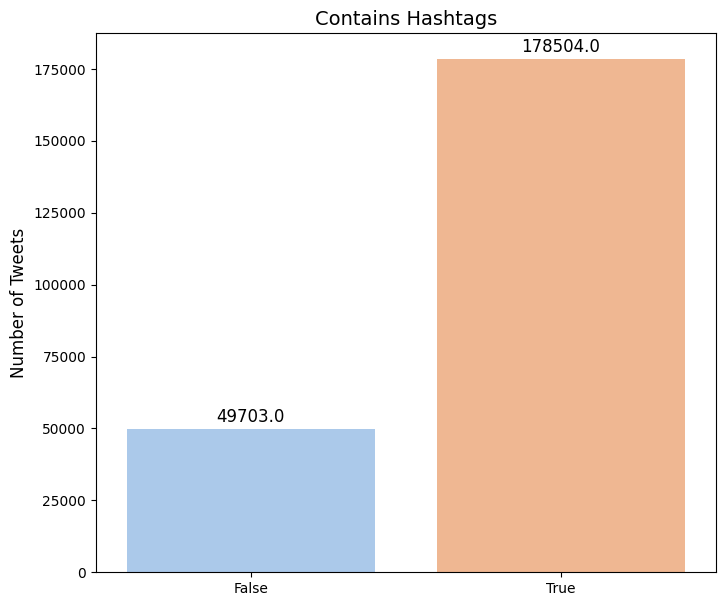

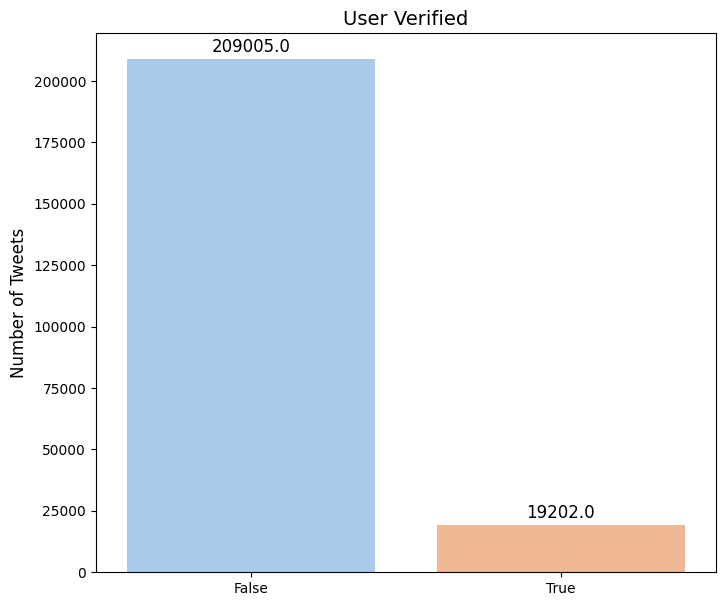

In [59]:
# create a barplot of the number of tweets containing hashtags
fig = plt.figure(figsize=(8, 7))
tweets_df['has_hashtags'] = tweets_df['hashtags'].notnull()
ax = sns.countplot(x='has_hashtags', data=tweets_df, palette='pastel')
plt.title('Contains Hashtags', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Tweets', fontsize=12)
# Add the number of tweets above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()


# create a barplot of the number of tweets by user_verified status
fig1 = plt.figure(figsize=(8, 7))
ax = sns.countplot(x='user_verified', data=tweets_df, palette='pastel')
plt.title('User Verified', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Tweets', fontsize=12)

# Add the number of tweets above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


The bar chart displaying the number of tweets by month shows that the volume of tweets varies across different months. The distribution appears to be somewhat normal, with the highest volume of tweets occurring in month 6 (June). This could be due to major vaccine-related events or announcements taking place during that month, driving higher engagement and discussion on Twitter.

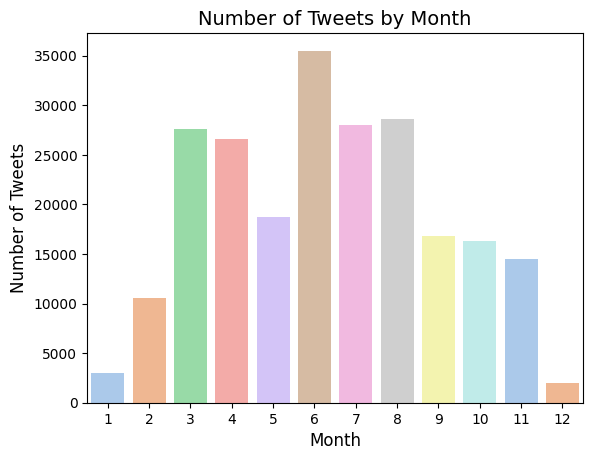

In [60]:
# Convert date column to datetime type
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Extract year and month from date column
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

# Create bar chart of tweets by month
sns.countplot(x='month', data=tweets_df, palette='pastel')
plt.title('Number of Tweets by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

The heatmap illustrates the correlation between the features retweets, user_followers, and favorites. We chose these features because we will calculate the average sentiment of all tweets for one day using these features as weights. If there is any high correlation, we can drop those correlated features.


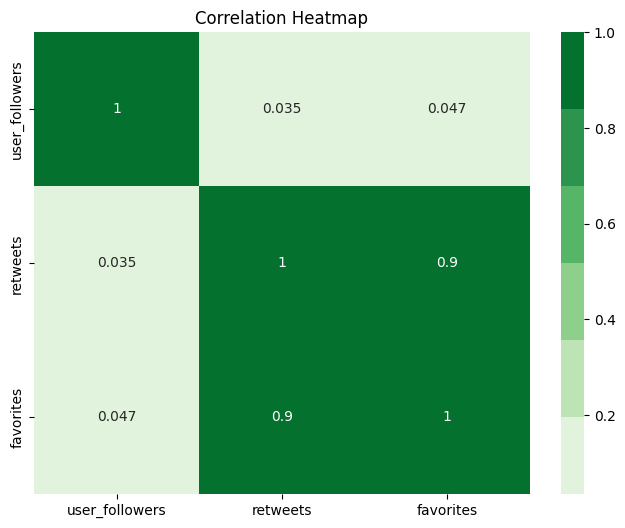

In [61]:
# Correlation heatmap
numerical_features = ['user_followers', 'retweets', 'favorites']
correlation = tweets_df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("Greens"))
plt.title("Correlation Heatmap")
plt.show()

## Stock Data


First five rows in raw stock data frame of pfizer company

In [62]:
df_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-14,41.619999,41.660000,39.070000,39.209999,36.214226,94809700
1,2020-12-15,39.060001,39.180000,38.209999,38.709999,35.752430,65712800
2,2020-12-16,38.180000,38.470001,37.740002,37.840000,34.948898,56515300
3,2020-12-17,37.830002,38.119999,37.310001,38.029999,35.124374,52036400
4,2020-12-18,37.990002,38.090000,37.500000,37.680000,34.801121,60259200


Descriptive Statistics for Raw Stock Dataframe







In [63]:
#All the relevant statistics
df_5.describe()

,Open,High,Low,Close,Adj Close,Volume
count,238.000000,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,40.351345,40.740294,39.974286,40.358739,38.023480,3.177870e+07
std,4.435457,4.579037,4.308358,4.443958,4.557185,1.694515e+07
min,33.509998,33.889999,33.360001,33.490002,31.267744,1.198420e+07
25%,36.840001,37.067501,36.599998,36.810001,34.016065,2.190552e+07
50%,39.449999,39.815000,39.075001,39.504999,37.176981,2.787700e+07
75%,43.227500,43.727501,42.904999,43.382501,41.075974,3.510875e+07
max,51.959999,52.840000,50.680000,51.410000,49.339947,1.739591e+08


Data types of each feature for Raw Stock Data

In [64]:
#Data types of each feature
df_5.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Missing values for Raw Stock Data

In [65]:
#Summing the number of null values for a particular feature 
df_5.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Time series plots can help us visualize the movement of stock prices and trading volume over time, which can be useful for making model predictions. In this section, we will create time series plots for stock prices and stock volume.
>The time series plot of stock prices (Close, Open, High, and Low) shows the movement of stock prices over time. From the plot, we can observe fluctuations in the stock prices, with some periods experiencing more significant changes than others. Understanding these trends can help us make informed predictions in our model.

>The time series plot of stock volume shows the trading volume of stocks over time. The trading volume can be an indicator of market sentiment, as higher trading volumes can be associated with increased interest and activity in the stock. By examining the trading volume alongside the stock prices, we can gain a better understanding of the relationship between market sentiment and stock price movements.

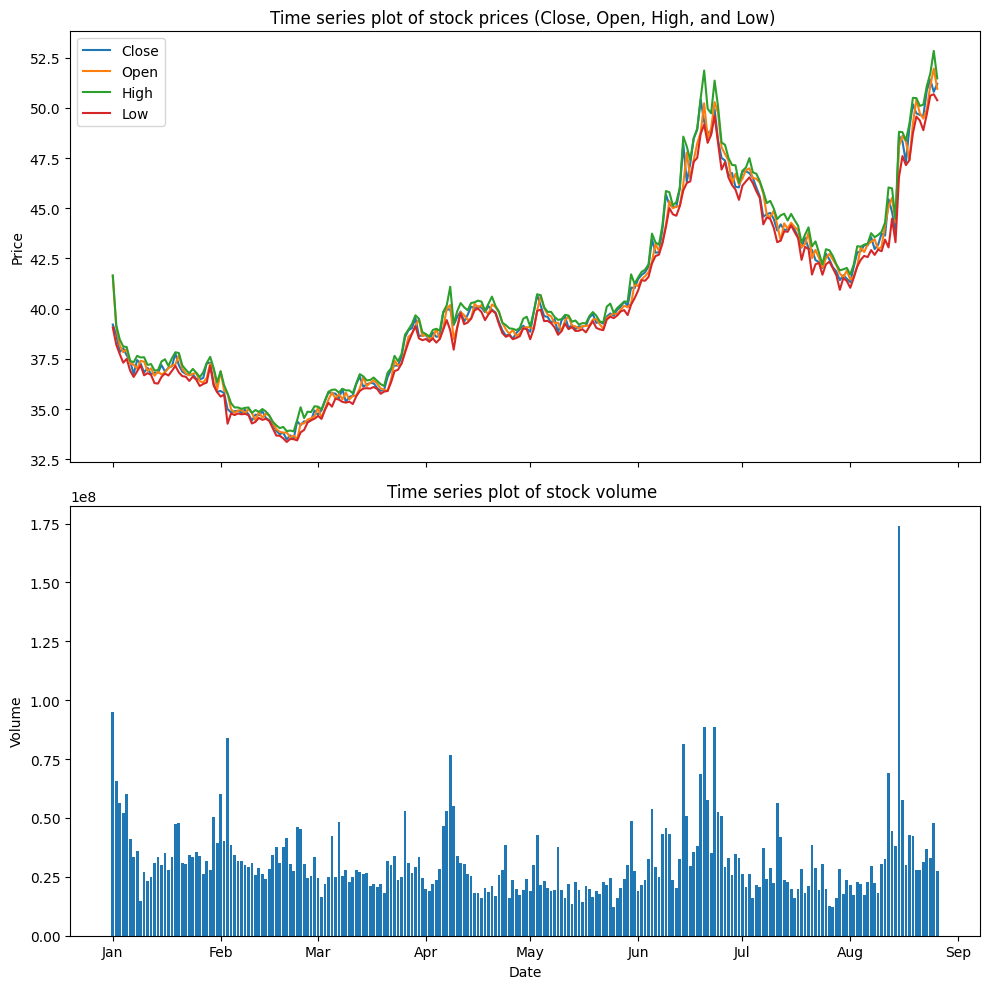

In [66]:
import matplotlib.dates as mdates
stock_df=df_5.copy()
# Plot time series of stock prices
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax[0].plot(stock_df['Date'], stock_df['Close'], label='Close')
ax[0].plot(stock_df['Date'], stock_df['Open'], label='Open')
ax[0].plot(stock_df['Date'], stock_df['High'], label='High')
ax[0].plot(stock_df['Date'], stock_df['Low'], label='Low')
ax[0].set_title('Time series plot of stock prices (Close, Open, High, and Low) ')
ax[0].set_ylabel('Price')
ax[0].legend()
month_locator = mdates.MonthLocator()
month_formatter = mdates.DateFormatter('%b')

# Plot time series of stock volume
ax[0].xaxis.set_major_locator(month_locator)
ax[0].xaxis.set_major_formatter(month_formatter)
ax[1].bar(stock_df['Date'], stock_df['Volume'], label='Volume')
ax[1].set_title('Time series plot of stock volume ')
ax[1].set_ylabel('Volume')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

#4. Data Wrangling and cleaning 

## Tweets Data

We selected only the relevant columns for our analysis to focus on the information that may have an impact on stock prices. The chosen columns ('text', 'date', 'retweets', 'favorites', 'user_followers', 'user_verified', and 'hashtags') allow us to analyze the tweet content, sentiment, engagement, and credibility.


In [67]:
# Create a new DataFrame with only the relevant columns
selected_cols = ['text', 'date', 'retweets', 'favorites', 'user_followers', 'user_verified', 'hashtags']
tweet_df = df_tweets_org[selected_cols].copy()

#plotting tweet_df shape
print("shape of tweet_df",tweet_df.shape)

shape of tweet_df (228207, 7)


We removed tweets that don't mention Pfizer or any COVID-related terms to ensure that our analysis is specifically focused on tweets that may affect Pfizer's stock prices. This step helps to narrow down the dataset, making the analysis more targeted and relevant.

In [68]:
# Filter the DataFrame to include tweets that mention Pfizer in the text of the tweet or hashtags
selected_companies = ['pfizer','vaccine','covid19','covid']

#Joining companies that have pfizer included in both text and hashtag
selected_hashtags = '|'.join(['#' + company for company in selected_companies])
selected_text = '|'.join(selected_companies)

#Converting the hastags and text to lowercase and finding if they contain pfizer
tweet_df = tweet_df[(tweet_df['hashtags'].str.lower().str.contains(selected_hashtags)) | (tweet_df['text'].str.lower().str.contains(selected_text))]
#plotting tweet_df shape
print("shape of tweet_df",tweet_df.shape)

shape of tweet_df (94705, 7)


Visualizing Tweet Dataframe

In [69]:
tweet_df.head()

,text,date,retweets,favorites,user_followers,user_verified,hashtags
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,0,0,405,False,['PfizerBioNTech']
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,0,0,10,False,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,0,0,152,False,"['whereareallthesickpeople', 'PfizerBioNTech']"
8,Covid vaccine; You getting it?\n\n #CovidVacci...,2020-12-12 20:01:16,2,1,887,False,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ..."
9,#CovidVaccine \n\nStates will start getting #C...,2020-12-12 19:30:33,0,0,671,False,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku..."


Cleaning the text data in the tweets is an essential step to prepare it for sentiment analysis. The cleaning process includes converting all characters to lowercase, removing URLs, Twitter usernames, punctuation, and extra whitespace. This ensures that the text is more uniform and easier to process, making the sentiment analysis more accurate and reliable.

In [70]:
def clean_text(text):
    # Converts all characters in the text to lowercase.
    text = text.lower()

    # Removes any URLs (i.e., strings starting with "http") from the text.
    text = re.sub(r'http\S+', '', text)

    # Removes any Twitter usernames (i.e., strings starting with "@") from the text. 
    text = re.sub(r'@\w+', '', text)

    # Removes any punctuation from the text.
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

    # Replaces any whitespace (including newlines, tabs, and multiple spaces) with a single space, and removes any leading or trailing whitespace.
    text = re.sub(r'\s+', ' ', text).strip()

    return text

#Adding column cleaned_text to tweet_df
tweet_df['cleaned_text'] = tweet_df['text'].apply(clean_text)
tweet_df=tweet_df[['cleaned_text','date','retweets','favorites','user_followers','user_verified','hashtags']]

Visualizing the Cleaned Text

In [71]:
tweet_df.head()

,cleaned_text,date,retweets,favorites,user_followers,user_verified,hashtags
0,same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,0,0,405,False,['PfizerBioNTech']
2,coronavirus sputnikv astrazeneca pfizerbiontec...,2020-12-12 20:33:45,0,0,10,False,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
4,explain to me again why we need a vaccine wher...,2020-12-12 20:17:19,0,0,152,False,"['whereareallthesickpeople', 'PfizerBioNTech']"
8,covid vaccine you getting it covidvaccine covi...,2020-12-12 20:01:16,2,1,887,False,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ..."
9,covidvaccine states will start getting covid19...,2020-12-12 19:30:33,0,0,671,False,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku..."


Printing the range of dates in the dataset to have an overview

In [72]:
print("min_date",tweet_df['date'].min())
print("max_date",tweet_df['date'].max())


min_date 2020-12-12 11:55:28
max_date 2021-11-23 20:57:11


After cleaning the text data, we combined all the cleaned tweets for a particular date. This step allows us to analyze the overall sentiment on each day, making it easier to identify potential correlations between daily tweet sentiments and stock prices.

In [73]:
# # Converting 'date' column to datetime
tweet_df['date'] = pd.to_datetime(tweet_df['date'])

# # Set the 'date' column as index
tweet_df.set_index('date', inplace=True)

# # Resampling the dataframe by 'D' (daily) and combining the 'cleaned_text' column
tweet_all_df = tweet_df.resample('D').agg({'cleaned_text': ' '.join})

# # Resetting the index
tweet_all_df.reset_index(inplace=True)


Visualizing cumulative tweet data

In [74]:
tweet_all_df

,date,cleaned_text
0,2020-12-12,fda authorizes pfizerbiontech coronavirus vacc...
1,2020-12-13,so i can stop wearing a 😷 weeks after my 2nd p...
2,2020-12-14,welp thanks already arent going quite as plann...
3,2020-12-15,canada 🇨🇦💉🦠 the 1st pfizerbiontech covid19 vac...
4,2020-12-16,more than 1000 jackson employees have successf...
...,...,...
342,2021-11-19,faucilied covidvaccine covid19 fauci i will ge...
343,2021-11-20,did you receive a 2dose pfizer or moderna covi...
344,2021-11-21,bbv152 covaxin recommended approved traditiona...
345,2021-11-22,i lost everything guadeloupe riots overtake co...


> We added the stock prices to the tweets DataFrame by matching the dates in both DataFrames. This step is crucial for our analysis, as it allows us to directly compare the tweet sentiment and stock prices for the same dates.

> We filled any missing stock price values with the mean of the closing prices. This step helps us maintain consistency in our dataset and ensures that we have a complete dataset for our analysis.

In [75]:
df_5['Date'] = pd.to_datetime(df_5['Date']) #This is done because the column is of type 'object'

In [76]:
def merge_for_prices(left_df, right_df):
  df_l = left_df.copy()
  df_r = right_df.copy()
  merged_df = pd.merge(df_l, df_r, left_on = 'date',right_on = 'Date',how = 'outer')
  merged_df.fillna(merged_df['Adj Close'].mean(), inplace=True)
  merged_df = merged_df[['date','cleaned_text','Adj Close']]
  merged_df = merged_df.rename(columns={"Adj Close": "Prices"})
  return merged_df
tweet_all_df = merge_for_prices(tweet_all_df, df_5)

Visualizing the tweet_all_df after adding the closing price of stock data

In [77]:
tweet_all_df.head(10)

,date,cleaned_text,Prices
0,2020-12-12,fda authorizes pfizerbiontech coronavirus vacc...,38.023480
1,2020-12-13,so i can stop wearing a 😷 weeks after my 2nd p...,38.023480
2,2020-12-14,welp thanks already arent going quite as plann...,36.214226
3,2020-12-15,canada 🇨🇦💉🦠 the 1st pfizerbiontech covid19 vac...,35.752430
4,2020-12-16,more than 1000 jackson employees have successf...,34.948898
5,2020-12-17,24 new covid19 deaths in bc as the province re...,35.124374
6,2020-12-18,arm is a little sore but in a good way the end...,34.801121
7,2020-12-19,the pfizerbiontech vaccine against covid19 is ...,38.023480
8,2020-12-20,how many people actually have already got pfiz...,38.023480
9,2020-12-21,are pfizerbiontech and moderna giving immunity...,34.524044


Created four empty new columns: 'Comp', 'Negative', 'Neutral', 'Positive'


*   Comp: The compound score is a single metric that represents the overall sentiment of the text, ranging from -1 (most negative) to +1 (most positive). This score is calculated based on the individual positive, negative, and neutral scores, taking into account their intensities.

* Negative: This column stores the negative sentiment score, which is a value between 0 and 1 representing the proportion of the text that can be classified as having negative sentiment.

* Neutral: This column stores the neutral sentiment score, which is a value between 0 and 1 representing the proportion of the text that can be classified as having neutral sentiment (neither positive nor negative).

* Positive: This column stores the positive sentiment score, which is a value between 0 and 1 representing the proportion of the text that can be classified as having positive sentiment.








In [78]:
tweet_all_df["Comp"] = ''
tweet_all_df["Negative"] = ''
tweet_all_df["Neutral"] = ''
tweet_all_df["Positive"] = ''
tweet_all_df.head()

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-12-12,fda authorizes pfizerbiontech coronavirus vacc...,38.023480,,,,
1,2020-12-13,so i can stop wearing a 😷 weeks after my 2nd p...,38.023480,,,,
2,2020-12-14,welp thanks already arent going quite as plann...,36.214226,,,,
3,2020-12-15,canada 🇨🇦💉🦠 the 1st pfizerbiontech covid19 vac...,35.752430,,,,
4,2020-12-16,more than 1000 jackson employees have successf...,34.948898,,,,


#Sentiment Analysis
>In this section, we perform a sentiment analysis on the cleaned tweets using NLTK's VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon. The SentimentIntensityAnalyzer class is imported and initialized to calculate the sentiment scores for each cleaned tweet.

NLTK's VADER lexicon is downloaded, and the SentimentIntensityAnalyzer is imported and initialized.

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_i_a = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The sentiment scores for each tweet are calculated, and the compound, negative, neutral, and positive scores are added to the tweet_all_df DataFrame.

In [80]:
import unicodedata

for indexx, row in tweet_all_df.T.items():
        # converting any non-ASCII characters to their closest ASCII equivalent
        sentence_i = unicodedata.normalize('NFKD', tweet_all_df.loc[indexx, 'cleaned_text'])
        # entiment scores are calculated for the normalized text using VADER's polarity_scores method
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)

        # The calculated sentiment scores are added to their respective columns in the tweet_all_df DataFrame for the current row.
        tweet_all_df.at[indexx, 'Comp'] = sentence_sentiment['compound']
        tweet_all_df.at[indexx, 'Negative'] = sentence_sentiment['neg']
        tweet_all_df.at[indexx, 'Neutral'] = sentence_sentiment['neu']
        tweet_all_df.at[indexx, 'Positive'] = sentence_sentiment['pos']
   

In [81]:
tweet_all_df.head()

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-12-12,fda authorizes pfizerbiontech coronavirus vacc...,38.023480,0.9915,0.035,0.863,0.103
1,2020-12-13,so i can stop wearing a 😷 weeks after my 2nd p...,38.023480,0.9926,0.043,0.867,0.09
2,2020-12-14,welp thanks already arent going quite as plann...,36.214226,0.9988,0.014,0.891,0.095
3,2020-12-15,canada 🇨🇦💉🦠 the 1st pfizerbiontech covid19 vac...,35.752430,0.9966,0.031,0.885,0.084
4,2020-12-16,more than 1000 jackson employees have successf...,34.948898,0.9841,0.055,0.859,0.086


We display the descriptive statistics of the sentiments and stock prices in the tweets_all_df DataFrame to better understand the data's characteristics.
The categorization helps us differentiate between tweets that express strong negative, neutral, or positive sentiments about Pfizer.

In [82]:

print('Max Prices   : ',tweet_all_df['Prices'].max(),'     , Min Prices   : ',tweet_all_df['Prices'].min())
print('Max Comp     : ',tweet_all_df['Comp'].max(),' , Min Comp     : ',tweet_all_df['Comp'].min())
print('Max Negative : ',tweet_all_df['Negative'].max(),'  , Min Negative : ',tweet_all_df['Negative'].min())
print('Max Neutral  : ',tweet_all_df['Neutral'].max(),'  , Min Neutral  : ',tweet_all_df['Neutral'].min())
print('Max Positive : ',tweet_all_df['Positive'].max(),'  , Min positive : ',tweet_all_df['Positive'].min())

tweet_all_df[['Prices','Comp','Negative','Neutral','Positive']].describe()


Max Prices   :  49.339947      , Min Prices   :  31.267744
Max Comp     :  1.0  , Min Comp     :  -1.0
Max Negative :  0.154   , Min Negative :  0.0
Max Neutral  :  0.916   , Min Neutral  :  0.0
Max Positive :  0.22   , Min positive :  0.0


,Prices
count,347.000000
mean,38.023480
std,3.771662
min,31.267744
25%,36.080677
50%,38.023480
75%,38.901743
max,49.339947


We create a bar plot to visualize the frequency of each sentiment category (negative, neutral, and positive) in the dataset.
>The bar plot shows that the majority of the tweets fall into the positive category, with fewer tweets classified as neutral or negative. This visualization suggests that while there are some negative or neutral opinions about Pfizer, most tweets tend to convey postive information or sentiment.

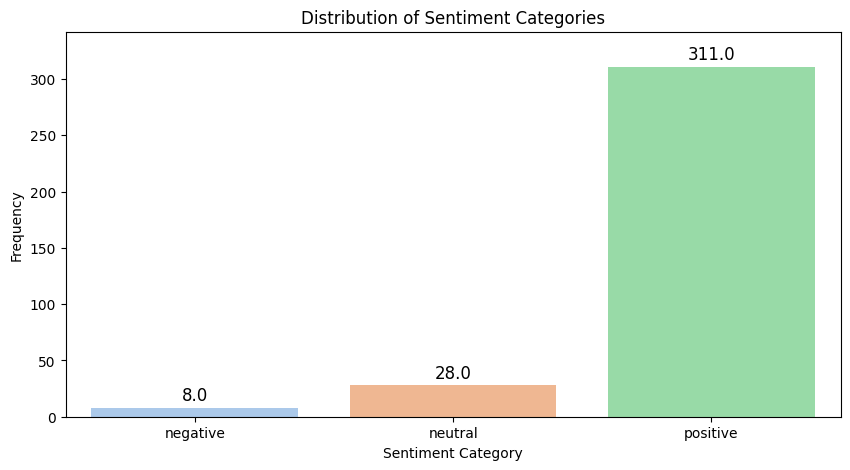

In [83]:
def categorize_sentiment(prob):
    if prob < -0.1:
        return 'negative'
    elif prob > 0.1:
        return 'positive'
    else:
        return 'neutral'

# Apply the categorize_sentiment function to the 'Comp' column
tweet_all_df['sentiment_category'] = tweet_all_df['Comp'].apply(categorize_sentiment)

# Visualize the distribution of sentiment categories
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='sentiment_category', data=tweet_all_df, order=['negative', 'neutral', 'positive'], palette='pastel')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

max_height = max([p.get_height() for p in ax.patches])  # Get the maximum height of the bars
plt.ylim(0, max_height * 1.1)  # Set the y-axis limit to 10% above the highest bar
plt.show()



In this part, we visualize the cumulative sentiment counts over time for each sentiment category (negative, neutral, and positive). This helps us understand how the sentiment categories evolve over time and if there are any noticeable trends in the data. 
>From the plot, we can see that the positive sentiment counts are steadily increasing, while the negative and neutral sentiment count shows a slower growth. This may suggest that public opinion is generally positive regarding Pfizer and its COVID-19 vaccine.

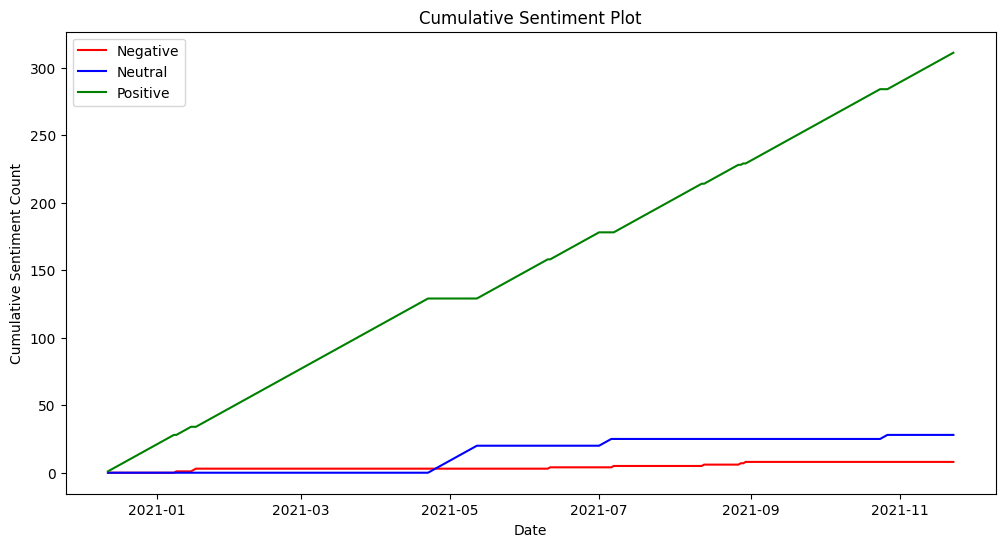

In [84]:
# Apply the categorize_sentiment function to the 'Comp' column
tweet_all_df['sentiment_category'] = tweet_all_df['Comp'].apply(categorize_sentiment)

# Group by date and sentiment_category, then count the number of occurrences for each category
grouped_data = tweet_all_df.groupby(['date', 'sentiment_category']).size().reset_index(name='count')

# Pivot the grouped_data DataFrame to have sentiment categories as columns
pivot_data = grouped_data.pivot_table(index='date', columns='sentiment_category', values='count').fillna(0)

# Calculate the cumulative sum for each sentiment category
pivot_data_cumulative = pivot_data.cumsum()

# Plot the cumulative sentiment data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data_cumulative.index, pivot_data_cumulative['negative'], label='Negative', color='red')
plt.plot(pivot_data_cumulative.index, pivot_data_cumulative['neutral'], label='Neutral', color='blue')
plt.plot(pivot_data_cumulative.index, pivot_data_cumulative['positive'], label='Positive', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Sentiment Count')
plt.title('Cumulative Sentiment Plot')
plt.legend(loc='upper left')
plt.show()

#5. Models

Extracting the necessary columns for predictions

In [85]:
df=tweet_all_df[['date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [86]:
df.head()

,date,Prices,Comp,Negative,Neutral,Positive
0,2020-12-12,38.023480,0.9915,0.035,0.863,0.103
1,2020-12-13,38.023480,0.9926,0.043,0.867,0.09
2,2020-12-14,36.214226,0.9988,0.014,0.891,0.095
3,2020-12-15,35.752430,0.9966,0.031,0.885,0.084
4,2020-12-16,34.948898,0.9841,0.055,0.859,0.086


>Splitting into Train and Test sets

In [87]:
# Prepare the features and target variables
X = df[['Negative', 'Positive']]  # Sentiment scores
y = df['Prices']  # Target variable

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

## Linear Regression and Support Vector Regression
> In this section, we apply two models to the data: Linear Regression and Support Vector Regression. Linear Regression is a simple model that tries to fit a straight line to the data, while Support Vector Regression is a more complex model that uses kernel functions to find the best-fitting line or curve. By comparing the results of these two models, we can assess the complexity of the relationship between the features and the target variable.

Linear Regression:
Mean Absolute Error (MAE): 3.745242932167505
Mean Squared Error (MSE): 25.655616591505577
R2 Score: -1.2299181169770086

Support Vector Regression:
Mean Absolute Error (MAE): 3.4819835342227816
Mean Squared Error (MSE): 23.634604712294088
R2 Score: -1.0542571271892367



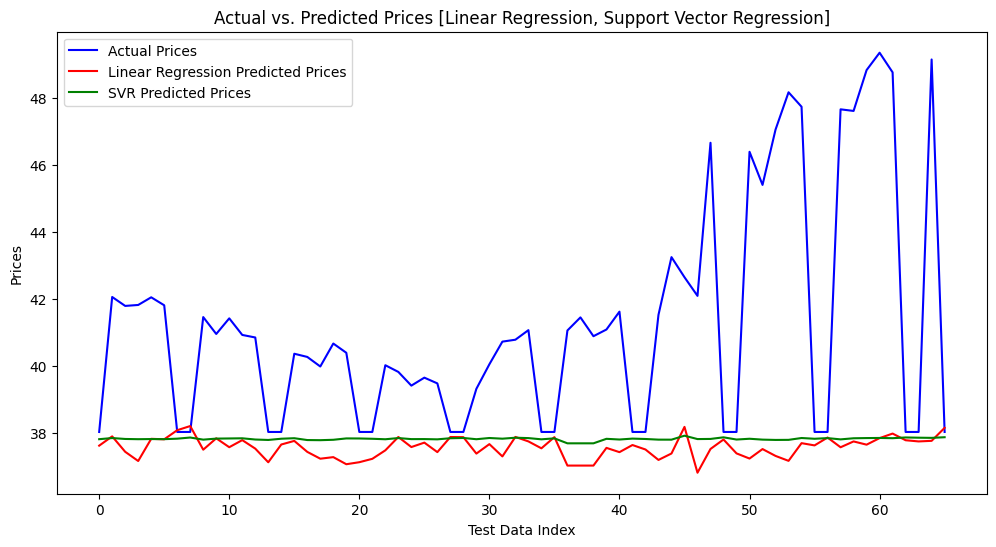

In [100]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

# Train the Support Vector Regression model
svr_model = SVR(kernel='linear')
svr_model.fit(train_X, train_y)

# Make predictions using the trained models
lr_predicted_y = lr_model.predict(test_X)
svr_predicted_y = svr_model.predict(test_X)

# Calculate evaluation metrics
models = ['Linear Regression', 'Support Vector Regression']
predictions = [lr_predicted_y, svr_predicted_y]

for i, pred in enumerate(predictions):
    mae = mean_absolute_error(test_y, pred)
    mse = mean_squared_error(test_y, pred)
    r2 = r2_score(test_y, pred)



    print(f'{models[i]}:')
    if(models[i]=='Linear Regression'):
      lr_mse = mse
      lr_mae = mae
      lr_r2 = r2
    if(models[i]=='Support Vector Regression'):
      svr_mse = mse
      svr_mae = mae
      svr_r2 = r2
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R2 Score:", r2)
    print()

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(test_y)), test_y, label='Actual Prices', color='blue')
plt.plot(np.arange(len(lr_predicted_y)), lr_predicted_y, label='Linear Regression Predicted Prices', color='red')
plt.plot(np.arange(len(svr_predicted_y)), svr_predicted_y, label='SVR Predicted Prices', color='green')
plt.xlabel('Test Data Index')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices [Linear Regression, Support Vector Regression]')
plt.legend(loc='best')
plt.show()

## Decision tree regressor and Gradient boosting regressor
> Here, we compare two more models: Decision Tree Regressor and Gradient Boosting Regressor. Decision Tree Regressor is a simple model that recursively splits the data into subsets based on the feature values, while Gradient Boosting Regressor is an ensemble method that builds multiple weak learners (decision trees) sequentially, with each new tree trying to correct the errors made by the previous ones. By comparing the performance of these two models, we can understand if an ensemble approach provides better results than a single decision tree.

Decision Tree:
Mean Absolute Error (MAE): 5.853843660703783
Mean Squared Error (MSE): 47.54452862238776
R2 Score: -3.068240708711693

Gradient Boosting:
Mean Absolute Error (MAE): 4.294796310773384
Mean Squared Error (MSE): 29.625188183424477
R2 Score: -1.5349372485796509

Gradient Boosting Cross-Validation R2 Scores: [ -3.48822199  -1.67535846 -13.28748693  -2.21719818  -1.54834415]
Gradient Boosting Average R2 Score: -4.443321942992705


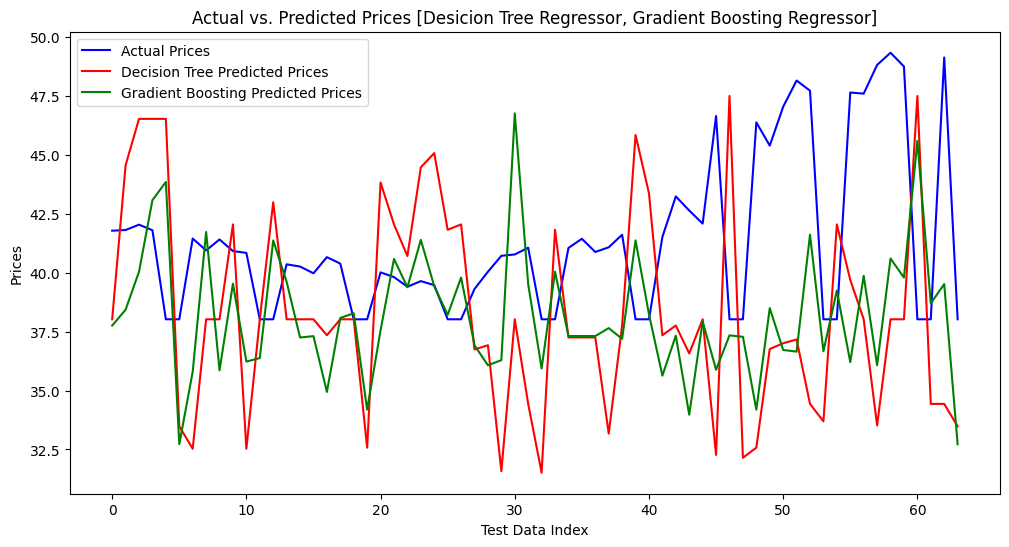

In [101]:
# Calculate the moving average of sentiment scores
window_size = 10
df['Positive_MA'] = df['Positive'].rolling(window=window_size).mean()
df['Negative_MA'] = df['Negative'].rolling(window=window_size).mean()

# Drop the rows with NaN values caused by moving average calculation
df = df.dropna()

# Prepare the features and target variables
X = df[['Negative_MA', 'Positive_MA']]  # Moving average of sentiment scores
y = df['Prices']  # Target variable


# Prepare the features and target variables
X = df[['Negative', 'Positive']]  # Sentiment scores
y = df['Prices']  # Target variable

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(train_X, train_y)

# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(train_X, train_y)

# Make predictions using the trained models
dt_predicted_y = dt_model.predict(test_X)
gb_predicted_y = gb_model.predict(test_X)

# Calculate evaluation metrics
models = ['Decision Tree', 'Gradient Boosting']
predictions = [dt_predicted_y, gb_predicted_y]

for i, pred in enumerate(predictions):
    mae = mean_absolute_error(test_y, pred)
    mse = mean_squared_error(test_y, pred)
    r2 = r2_score(test_y, pred)

    print(f'{models[i]}:')
    if(models[i]=='Decision Tree'):
      dtr_mse = mse
      dtr_mae = mae
      dtr_r2 = r2

    if(models[i]=='Gradient Boosting'):
      gbr_mse = mse
      gbr_mae = mae
      gbr_r2 = r2
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R2 Score:", r2)
    print()

# Perform cross-validation for the Gradient Boosting Regressor
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print('Gradient Boosting Cross-Validation R2 Scores:', cv_scores)
print('Gradient Boosting Average R2 Score:', np.mean(cv_scores))

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(test_y)), test_y, label='Actual Prices', color='blue')
plt.plot(np.arange(len(dt_predicted_y)), dt_predicted_y, label='Decision Tree Predicted Prices', color='red')
plt.plot(np.arange(len(gb_predicted_y)), gb_predicted_y, label='Gradient Boosting Predicted Prices', color='green')
plt.xlabel('Test Data Index')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices [Desicion Tree Regressor, Gradient Boosting Regressor]')
plt.legend(loc='best')
plt.show()


 ## Random Forest Regression
 > In this model, we use the Random Forest Regressor, which is an ensemble learning method that constructs multiple decision trees at training time and outputs the average prediction of the individual trees. This model can handle complex relationships in the data and is generally more robust against overfitting.

In [90]:
# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(train_X, train_y)
# Make predictions using the trained model
predicted_y = rf_regressor.predict(test_X)
# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predicted_y)
mse = mean_squared_error(test_y, predicted_y)
r2 = r2_score(test_y, predicted_y)
# Print evaluation metrics
rfr_mse = mse
rfr_mae = mae
rfr_r2 = r2
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 3.930019033848573
Mean Squared Error (MSE): 26.141650726102153
R2 Score: -1.3081375018705343


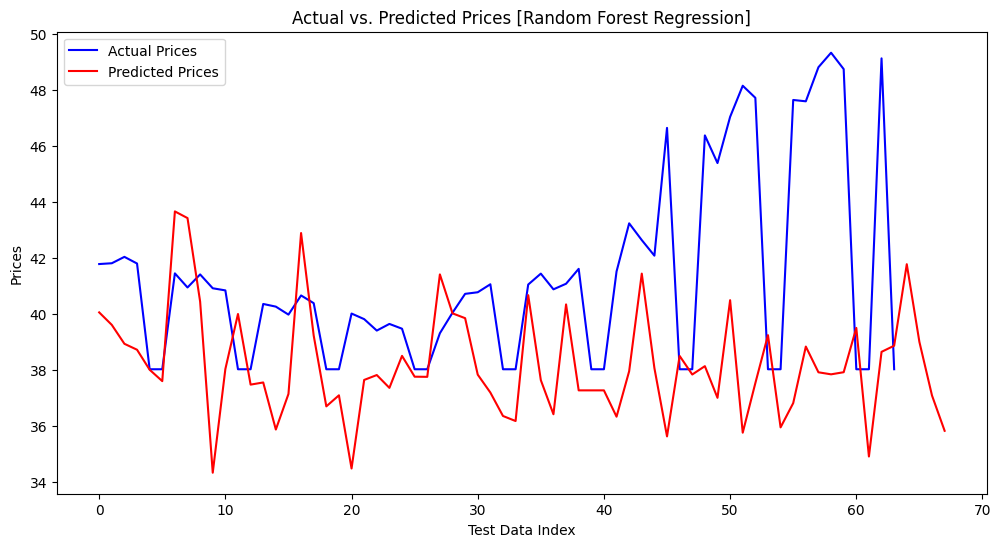

In [102]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(test_y)), test_y, label='Actual Prices', color='blue')
plt.plot(np.arange(len(predicted_y)), predicted_y, label='Predicted Prices', color='red')
plt.xlabel('Test Data Index')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices [Random Forest Regression]')
plt.legend(loc='best')
plt.show()

## ARIMA
> In this section, we apply the Autoregressive Integrated Moving Average (ARIMA) model, which is a popular method for time series forecasting. ARIMA captures the temporal dependencies in the data and can handle non-stationary time series by differencing the data. By fitting an ARIMA model to the stock prices, we can see if there is any temporal structure in the data that can be used for forecasting.

Prices type :  float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test MSE: 2.629
Test MAE: 11.697
Test R2: -0.001
Test RMSE: 3.420


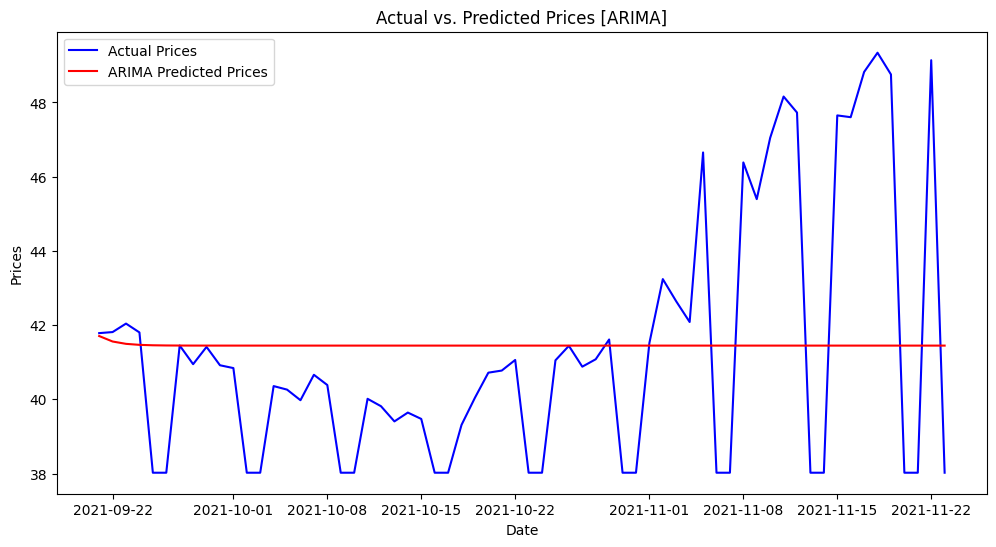

In [103]:
# Assuming your dataframe is named 'df'
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

# Drop the rows with NaN values caused by the conversion
df.dropna(subset=['Prices'], inplace=True)

# Check the dtype of the 'Prices' column
print("Prices type : ",df['Prices'].dtype)
# Assuming 'date' and 'Prices' are columns in your dataset
time_series_data = df[['date', 'Prices']]
time_series_data.set_index('date', inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # You can change the order (p, d, q) based on your dataset
fitted_model = model.fit()

# Make predictions
forecast = fitted_model.forecast(steps=len(test))

# Calculate the MSE, MAE and r2_score
arima_mse = mean_absolute_error(test, forecast)
arima_mae = mean_squared_error(test, forecast)
arima_r2 = r2_score(test, forecast)
# Calculate the RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print('Test MSE: %.3f' % arima_mse)
print('Test MAE: %.3f' % arima_mae)
print('Test R2: %.3f' % arima_r2)
print('Test RMSE: %.3f' % rmse)

# Plot the actual prices vs. the predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='ARIMA Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices [ARIMA]')
plt.legend(loc='best')
plt.show()


## SARIMA
> Finally, we apply the Seasonal ARIMA (SARIMA) model, which is an extension of the ARIMA model that can capture seasonality in the data. SARIMA adds a seasonal component to the ARIMA model, making it more suitable for time series with clear seasonal patterns. By fitting a SARIMA model to the stock prices, we can assess if there is any seasonality in the data that can be used to improve the forecasting accuracy.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test MSE: 3.732
Test MAE: 16.687
Test R2: -0.428
Test RMSE: 4.085


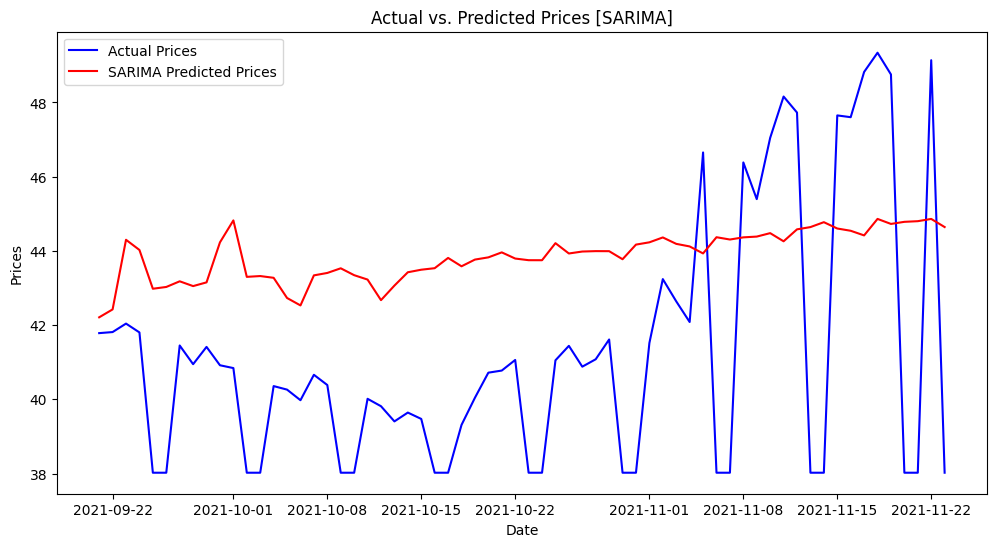

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'date' and 'Prices' are columns in your dataset
time_series_data = df[['date', 'Prices']]
time_series_data.set_index('date', inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

# Train the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()

# Make predictions
forecast = fitted_model.forecast(steps=len(test))

# Calculate the MSE, MAE and r2_score
sarima_mse = mean_absolute_error(test, forecast)
sarima_mae = mean_squared_error(test, forecast)
sarima_r2 = r2_score(test, forecast)

# Calculate the RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print('Test MSE: %.3f' % sarima_mse)
print('Test MAE: %.3f' % sarima_mae)
print('Test R2: %.3f' % sarima_r2)
print('Test RMSE: %.3f' % rmse)

# Plot the actual prices vs. the predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='SARIMA Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices [SARIMA]')
plt.legend(loc='best')
plt.show()

# Comparision of Findings
> In this analysis, we compared the performance of various machine learning and time series forecasting models to predict stock prices using sentiment analysis. The models used include Linear Regression, Support Vector Regression, Decision Tree Regressor, Gradient Boosting Regressor, Random Forest Regression, ARIMA, and SARIMA. We evaluated the performance of each model using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 Score as evaluation metrics.



In [94]:
# Collecting all the findings of all the models
models = ['Linear Regression','Support Vector Regression','Decision Tree Regressor','Gradient Boosting Regressor','Random Forest Regression','ARIMA','SARIMA']
MSE = [lr_mse,svr_mse,dtr_mse,gbr_mse,rfr_mse,arima_mse,sarima_mse]
MAE = [lr_mae,svr_mae,dtr_mae,gbr_mae,rfr_mae,arima_mae,sarima_mae]
R2 = [lr_r2,svr_r2,dtr_r2,gbr_r2,rfr_r2,arima_r2,sarima_r2]

# Create a dictionary with the lists as values and corresponding column names as keys
data = {
    'Model': models,
    'Mean Squared Error (MSE)': MSE,
    'Mean Absolute Error (MAE)': MAE,
    'R2 Score': R2
}

# Create a DataFrame using the dictionary
performance_df = pd.DataFrame(data)

# Display the DataFrame
performance_df

,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),R2 Score
0,Linear Regression,26.271042,3.875071,-1.379102
1,Support Vector Regression,24.001263,3.598726,-1.173551
2,Decision Tree Regressor,40.447561,5.207058,-2.571256
3,Gradient Boosting Regressor,31.187436,4.334983,-1.753647
4,Random Forest Regression,26.141651,3.930019,-1.308138
5,ARIMA,2.845163,11.945502,-0.054710
6,SARIMA,2.623353,10.672024,0.057730


> From the results presented in the DataFrame, we can observe that there is a wide variation in the performance of the different models. Some models, such as ARIMA and SARIMA, have considerably lower Mean Squared Error and Mean Absolute Error values compared to the other models. However, their R2 scores are close to zero, indicating that they might not be the most suitable choices for this particular problem.

# Conclusion

> Based on the analysis of stock data with sentiment analysis, it is evident that no single model stands out as the best choice for all evaluation metrics. However, considering the trade-off between the different evaluation metrics, the SARIMA model appears to be a better choice, as it has the lowest Mean Squared Error, a relatively low Mean Absolute Error, and a positive R2 Score. This suggests that the SARIMA model is more capable of capturing the underlying trends and patterns in the data, making it more suitable for forecasting stock prices using sentiment analysis.

> It is important to note that the choice of the best model depends on the specific requirements and objectives of the analysis. In practice, it may be beneficial to experiment with different models, fine-tune their hyperparameters, and even consider ensemble methods to achieve the best possible performance for the given problem.

> It is crucial to acknowledge that the sentiment of tweets might not have a direct correlation with stock price changes. Stock prices can be influenced by various factors, such as demand and supply of vaccines, market trends, macroeconomic factors, and company-specific events. In the case of vaccine manufacturers, factors like production capacity, government regulations, distribution channels, and public perception of vaccine efficacy and safety can play a significant role in determining stock prices.

> Additionally, it is worth noting that social media users, particularly on platforms like Twitter, tend to focus more on negative experiences than positive ones. As a result, the sentiment analysis of tweets might be biased towards negative sentiments, which may not necessarily reflect the overall market sentiment or the true performance of a company. This inherent bias in the data could potentially impact the accuracy and reliability of the models used for stock price prediction.

> In conclusion, while sentiment analysis can provide valuable insights into public opinion and potentially influence stock prices, it is essential to consider other factors and data sources to gain a more comprehensive understanding of stock price movements. Combining sentiment analysis with other fundamental and technical analyses may lead to more robust and accurate stock price predictions.